# Experiments | Analys of Social Network growth

In [1]:
from modules import *
import matplotlib.animation as animation
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# We define our global parameters and variables
infectionRate = 0.005
recoveryRate = 0.01
N = 1000
neighbors = 5
initial_infected = 25
t = 300

## Barabasi - Albert random networks

In [3]:
G = nx.barabasi_albert_graph(N, neighbors)
pos = nx.spring_layout(G)

In [4]:
historyRan = simulate(G, t, infectionRate, recoveryRate, infection_type='random', initial_infected=initial_infected)
historyPR = simulate(G, t, infectionRate, recoveryRate, infection_type='popular', initial_infected=initial_infected)
historyCluster = simulate(G, t, infectionRate, recoveryRate, infection_type='cluster', 
                          initial_infected=initial_infected, neighbors=neighbors)

Now we plot our curves

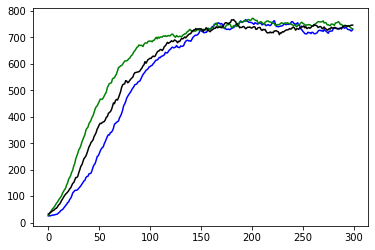

In [5]:
plt.plot(historyRan, 'b')
plt.plot(historyPR, 'g')
plt.plot(historyCluster, 'black')
plt.show()

Let's take a look at a 100 steps period.

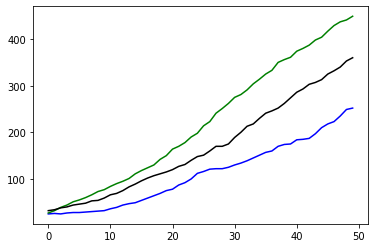

In [6]:
plt.plot(historyRan[:50], 'b')
plt.plot(historyPR[:50], 'g')
plt.plot(historyCluster[:50], 'black')
plt.show()

## Facebook Network - (https://snap.stanford.edu/data/ego-Facebook.html)

We read the database

In [7]:
FB = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(), nodetype=int)

In [8]:
nx.info(FB)

'Name: \nType: Graph\nNumber of nodes: 4039\nNumber of edges: 88234\nAverage degree:  43.6910'

Let's see how it looks.

/home/raimundo/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


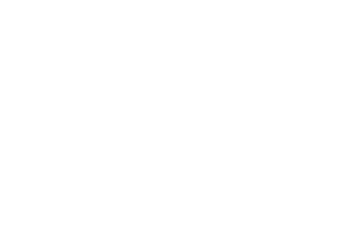

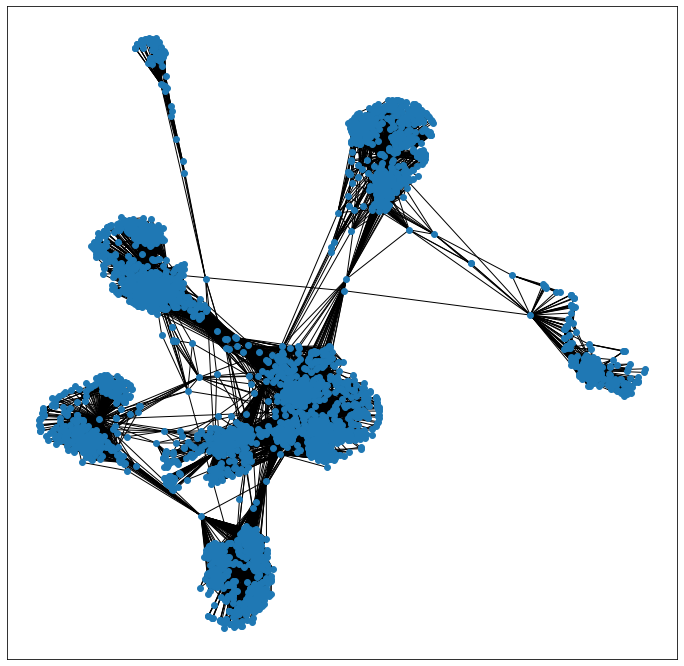

In [8]:
sp = nx.spring_layout(FB)
plt.axis('off')
plt.figure(figsize=(12,12))
nx.draw_networkx(FB, pos=sp, with_labels=False, node_size=35)
plt.show()

In [9]:
# We define our global parameters and variables
infectionRate = 0.0057
recoveryRate = 0.19
N = nx.number_of_nodes(FB)
neighbors = 5
initial_infected = 25
t = 400

### Popularity experiments

In [10]:
historyRan = simulate(FB, t, infectionRate, recoveryRate, infection_type='random', initial_infected=initial_infected)
historyPR = simulate(FB, t, infectionRate, recoveryRate, infection_type='popular', initial_infected=initial_infected)
historyCluster = simulate(FB, t, infectionRate, recoveryRate, infection_type='cluster', 
                          initial_infected=initial_infected, neighbors=neighbors)

Now we plot the experiments.

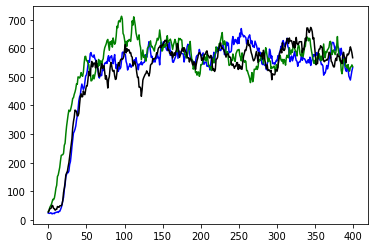

In [11]:
plt.plot(historyRan, 'b')
plt.plot(historyPR, 'g')
plt.plot(historyCluster, 'black')
plt.show()

Let's zoom it to a 50 week period.

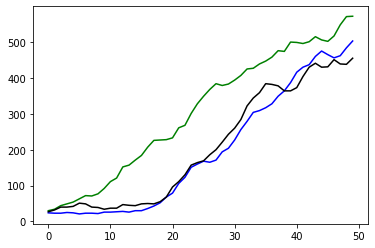

In [12]:
plt.plot(historyRan[:50], 'b')
plt.plot(historyPR[:50], 'g')
plt.plot(historyCluster[:50], 'black')
plt.show()

### Infection Rate experiments

In [13]:
# We define our parameters and variables
infectionRate = [0.004, 0.006, 0.008]
recoveryRate = 0.15
N = nx.number_of_nodes(FB)
neighbors = 5
initial_infected = 25
t = 400

In [14]:
history = []
for IR in infectionRate:
    history.append(simulate(FB, t, IR, recoveryRate, infection_type='random', initial_infected=initial_infected))

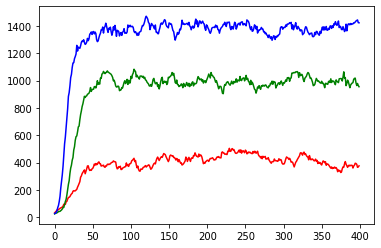

In [15]:
for h, c in zip(history, ['r','g','b']):
    plt.plot(h,c)
plt.show()

Let's zoom it to a 100 step period

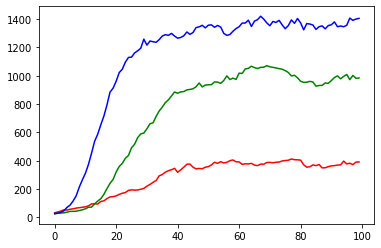

In [16]:
for h, c in zip(history, ['r','g','b']):
    plt.plot(h[:100],c)
plt.show()

### Recovery Rate experiments

In [17]:
# We define our parameters and variables
infectionRate = 0.006
recoveryRate = [0.1, 0.15, 0.2]
N = nx.number_of_nodes(FB)
neighbors = 5
initial_infected = 25
t = 400

In [18]:
history = []
for RR in recoveryRate:
    history.append(simulate(FB, t, infectionRate, RR, infection_type='random', initial_infected=initial_infected))

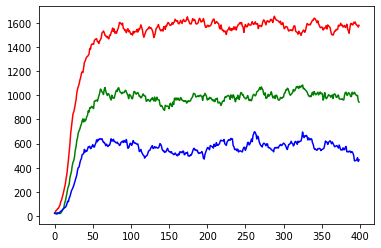

In [19]:
for h, c in zip(history, ['r','g','b']):
    plt.plot(h,c)
plt.show()

Let's watch it on a 100 timestep period.

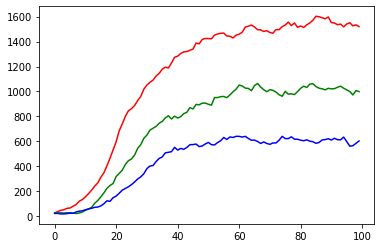

In [20]:
for h, c in zip(history, ['r','g','b']):
    plt.plot(h[:100],c)
plt.show()